<a href="https://colab.research.google.com/github/swaraj-patil-18/OIBSIP/blob/main/Task5_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/Internship/Advertising.csv"
df = pd.read_csv(file_path)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
newdf=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
newdf

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
newdf.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


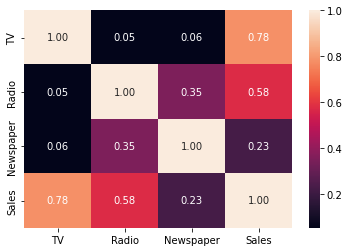

In [ ]:
sns.heatmap(newdf.corr(), annot=True, fmt=".2f")

Sales is highly correlated with "TV" advertisement and have moderate and low correlation with "Radio" and "Newspaper" repectively

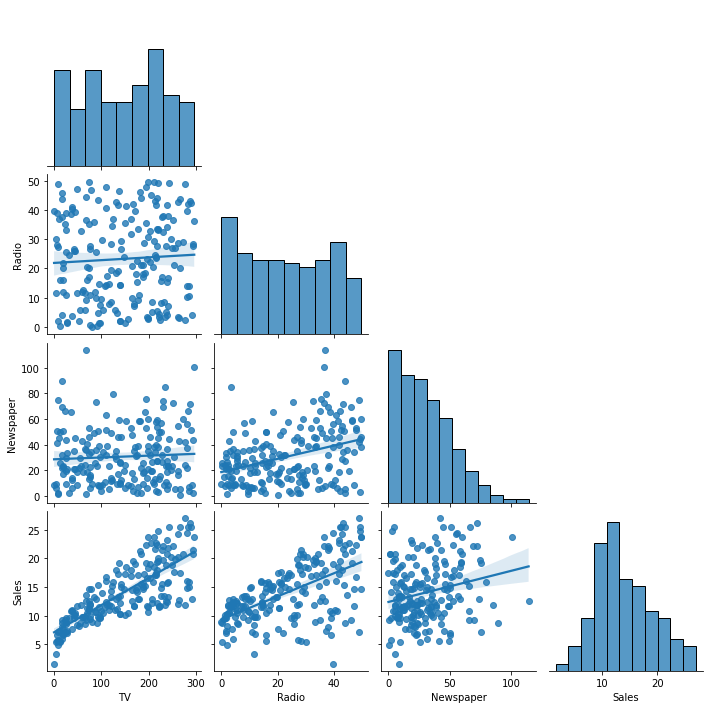

In [ ]:
sns.pairplot(newdf, kind="reg",corner=True, )

Split the data into features and target

In [ ]:
features = newdf.drop("Sales", axis=1)
target = newdf["Sales"]

In [ ]:
# Split data for training and testing
X_train, X_test, y_train, y_test =train_test_split(features,target, test_size=0.2, random_state=45)
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Shape of X_train (160, 3)
Shape of y_train (160,)


**Multiple Linear Regression**

In [ ]:
# Create regressor for Multiple Regression
mul_reg= LinearRegression()

In [ ]:
# fit the train data in the model
mul_reg.fit(X_train, y_train)

LinearRegression()

**Test the model**

In [ ]:
# predict sales for test data
pred = mul_reg.predict(X_test)

In [ ]:
# compare actual sales to predicted sales
compare= pd.DataFrame({"y_test":list(y_test), "pred":list(pred)})
compare.head()

,y_test,pred
0,14.9,15.188873
1,8.8,10.205411
2,16.6,16.439320
3,23.8,21.808189
4,12.0,15.887521


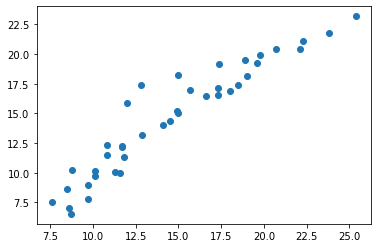

In [ ]:
# plot of the comparison
plt.scatter(y_test, pred)

# Model Evaluation

In [ ]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, pred)
print("Mean Absolute error:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, pred)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, pred)
print("R2 Score:{}".format(R2))

Mean Absolute error:1.0788802763848646
Mean Squared error: 1.5021631892976657
R2 Score:0.8955882331233612
